In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            silhouette_score

In [3]:
data = pd.read_csv("covid_19_indonesia_time_series_all.csv")
df = pd.DataFrame(data)

In [4]:
used_df = df[['Province', 'Total Cases', 'Total Deaths']].groupby(['Province']).agg('sum')
used_df

,Total Cases,Total Deaths
Province,,
Aceh,19962180,980913
Bali,66247623,2017352
Banten,100598017,1426619
Bengkulu,12347482,243057
DKI Jakarta,545806047,7672746
Daerah Istimewa Yogyakarta,86090207,2484820
Gorontalo,6746166,233646
Jambi,15700629,366115
Jawa Barat,439196053,7097250


In [5]:
# statistics of the data
used_df.describe()

,Total Cases,Total Deaths
count,3.400000e+01,3.400000e+01
mean,7.454510e+07,2.138956e+06
std,1.218907e+08,3.713779e+06
min,6.746166e+06,1.471960e+05
25%,1.661122e+07,3.666302e+05
50%,2.775264e+07,7.760960e+05
75%,6.675359e+07,1.742820e+06
max,5.458060e+08,1.538429e+07


In [6]:
X = used_df['Total Cases']
y = used_df['Total Deaths']

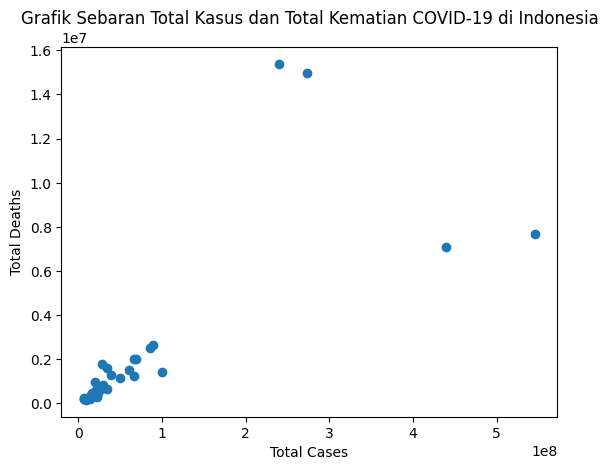

In [7]:
plt.scatter(X, y)
plt.title('Grafik Sebaran Total Kasus dan Total Kematian COVID-19 di Indonesia')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

C:\Users\M-SI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


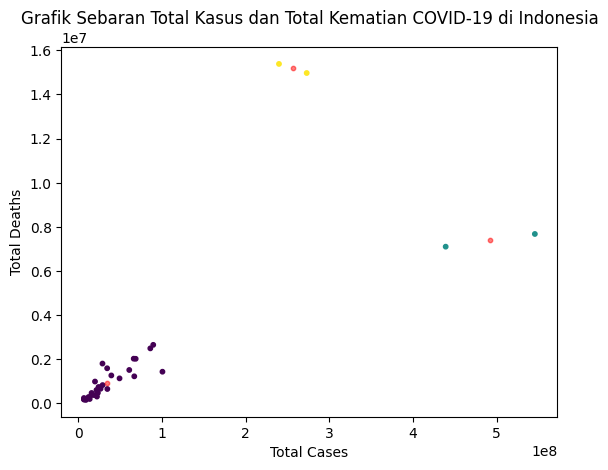

In [8]:
# kmeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(used_df)
y_kmeans = kmeans.predict(used_df)

# plot the cluster
plt.scatter(X, y, c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5)
plt.title('Grafik Sebaran Total Kasus dan Total Kematian COVID-19 di Indonesia')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()


In [9]:
# silhouette score
silhouette_score(used_df, y_kmeans)

0.840811049626551